In [83]:
import pandas as pd
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns


In [84]:
df = pd.read_csv('dataset_chiffre_r.csv')


In [85]:
df

,images,category
0,dataset_chiffre/0/img001-00001.png,0
1,dataset_chiffre/0/img001-00002.png,0
2,dataset_chiffre/0/img001-00003.png,0
3,dataset_chiffre/0/img001-00004.png,0
4,dataset_chiffre/0/img001-00005.png,0
...,...,...
10155,dataset_chiffre/9/img010-01012.png,9
10156,dataset_chiffre/9/img010-01013.png,9
10157,dataset_chiffre/9/img010-01014.png,9
10158,dataset_chiffre/9/img010-01015.png,9


In [86]:
df['category']

0        0
1        0
2        0
3        0
4        0
        ..
10155    9
10156    9
10157    9
10158    9
10159    9
Name: category, Length: 10160, dtype: int64

In [87]:
le = preprocessing.LabelEncoder()
le.fit(df['category'])
y = le.transform(df['category'])
print(y.shape)
print(list(le.inverse_transform([0, 1, 2])))


(10160,)
[np.int64(0), np.int64(1), np.int64(2)]


In [88]:
X = []
index = 0

for files in df.images: 
    X.append(cv2.cvtColor(cv2.imread(files), cv2.COLOR_BGR2RGB))
    index = index+1

X = np.asarray(X)
print(X.shape)

(10160, 128, 128, 3)


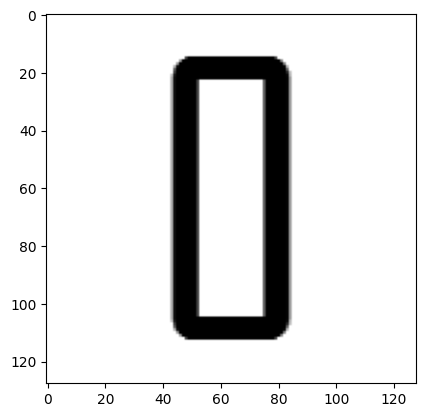

In [89]:
plt.imshow(X[0])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6807, 128, 128, 3)
(6807,)
(3353, 128, 128, 3)
(3353,)


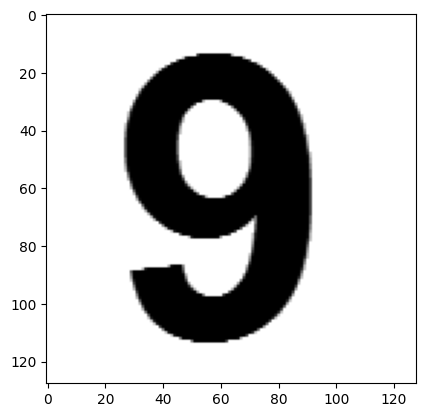

In [91]:
plt.imshow(X_train[10])

In [92]:

model = keras.models.Sequential()
  
model.add(keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(400, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(400, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))  # 10 classes pour chiffres

c:\Users\Clément\OneDrive - Haute Ecole de Namur-Liege-Luxembourg\Documents\Année M1\Système intelligent\r-solution-de-sudoku\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model.summary()

model.compile(optimizer='adam',#function for get down the gradient
              loss='sparse_categorical_crossentropy',#loss function for classification
              metrics=['accuracy']) #the metric 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 63, 63, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 400)            │     2,509,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,679,642 (10.22 MB)

 Trainable params: 2,679,642 (10.22 MB)

 Non-trainable params: 0 (0.00 B)

In [94]:
%%time

batch_size  = 20
epochs      =  15
history = model.fit(  X_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data=(X_test, y_test))

Epoch 1/15
341/341 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.4979 - loss: 30.3549 - val_accuracy: 0.9308 - val_loss: 0.2383
Epoch 2/15
341/341 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.8912 - loss: 0.3724 - val_accuracy: 0.9541 - val_loss: 0.1535
Epoch 3/15
341/341 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.9277 - loss: 0.2377 - val_accuracy: 0.9591 - val_loss: 0.1278
Epoch 4/15
341/341 ━━━━━━━━━━━━━━━━━━━━ 44s 75ms/step - accuracy: 0.9496 - loss: 0.1752 - val_accuracy: 0.9666 - val_loss: 0.1172
Epoch 5/15
341/341 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.9563 - loss: 0.1431 - val_accuracy: 0.9678 - val_loss: 0.0991
Epoch 6/15
341/341 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.9657 - loss: 0.1200 - val_accuracy: 0.9714 - val_loss: 0.0835
Epoch 7/15
341/341 ━━━━━━━━━━━━━━━━━━━━ 25s 72ms/step - accuracy: 0.9669 - loss: 0.1197 - val_accuracy: 0.9764 - val_loss: 0.0781
Epoch 8/15
341/341 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.9660 - loss: 0.1214 -

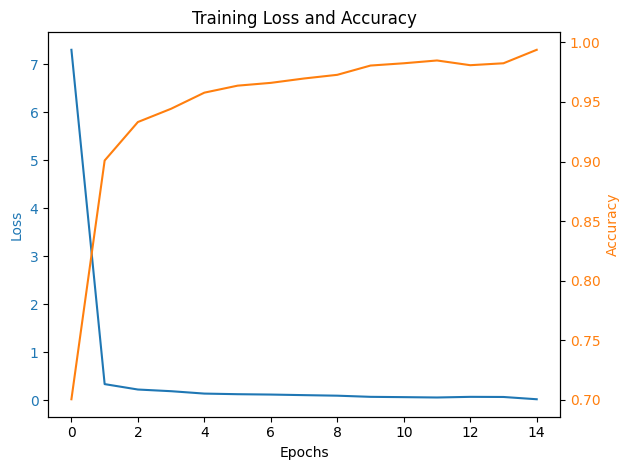

In [95]:
fig, ax1 = plt.subplots()   

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.plot(history.history['loss'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:orange')
ax2.plot(history.history['accuracy'], color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Training Loss and Accuracy')
fig.tight_layout()
plt.show()

In [96]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.0541
Test accuracy : 0.9860


In [97]:
y_sigmoid = model.predict(X_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       356
           1     0.9485    0.9943    0.9709       352
           2     0.9940    0.9910    0.9925       332
           3     0.9939    0.9879    0.9909       331
           4     0.9825    0.9941    0.9882       338
           5     0.9938    0.9725    0.9830       327
           6     0.9732    0.9939    0.9835       329
           7     0.9909    0.9619    0.9762       341
           8     0.9969    0.9787    0.9877       329
           9     0.9905    0.9843    0.9874       318

    accuracy                         0.9860      3353
   macro avg     0.9864    0.9859    0.9860      3353
weighted avg     0.9863    0.9860    0.9860      3353



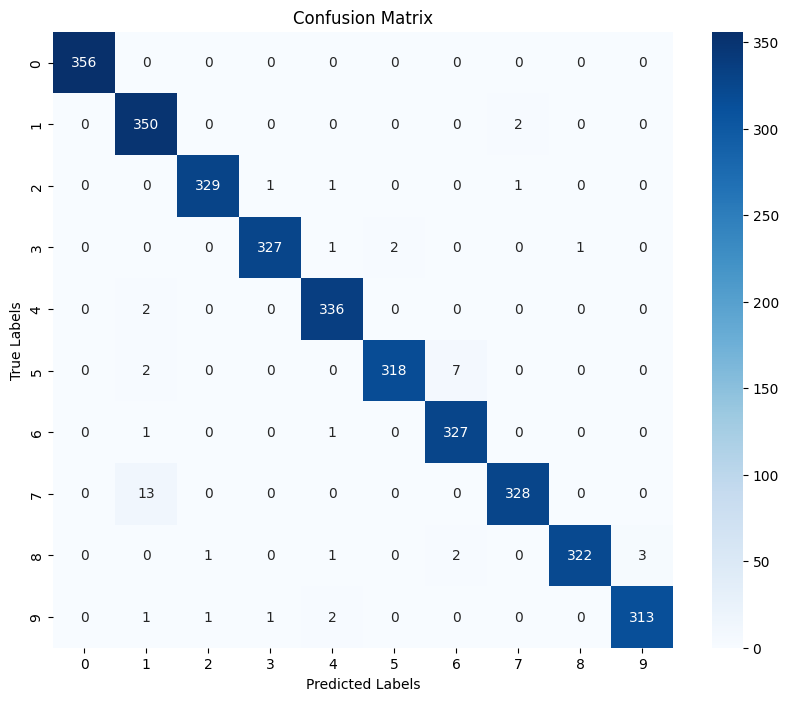

In [98]:
print(classification_report(y_test, y_pred, digits=4))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [99]:
# YOU NEED TO CHANGE THE FILEPATH
# model_path = "c:/Image_save/sudoku_model.keras"  # Chemin où le modèle sera sauvegardé
# tf.keras.models.save_model(
#     model,
#     filepath = model_path,
#     overwrite=True,
# )
# model2 = keras.models.load_model(model_path)


In [100]:
# Indices des erreurs
errors = [i for i in range(len(X_test)) if y_pred[i] != y_test[i]]
print(f"Nombre d'erreurs : {len(errors)} / {len(X_test)}")


Nombre d'erreurs : 47 / 3353


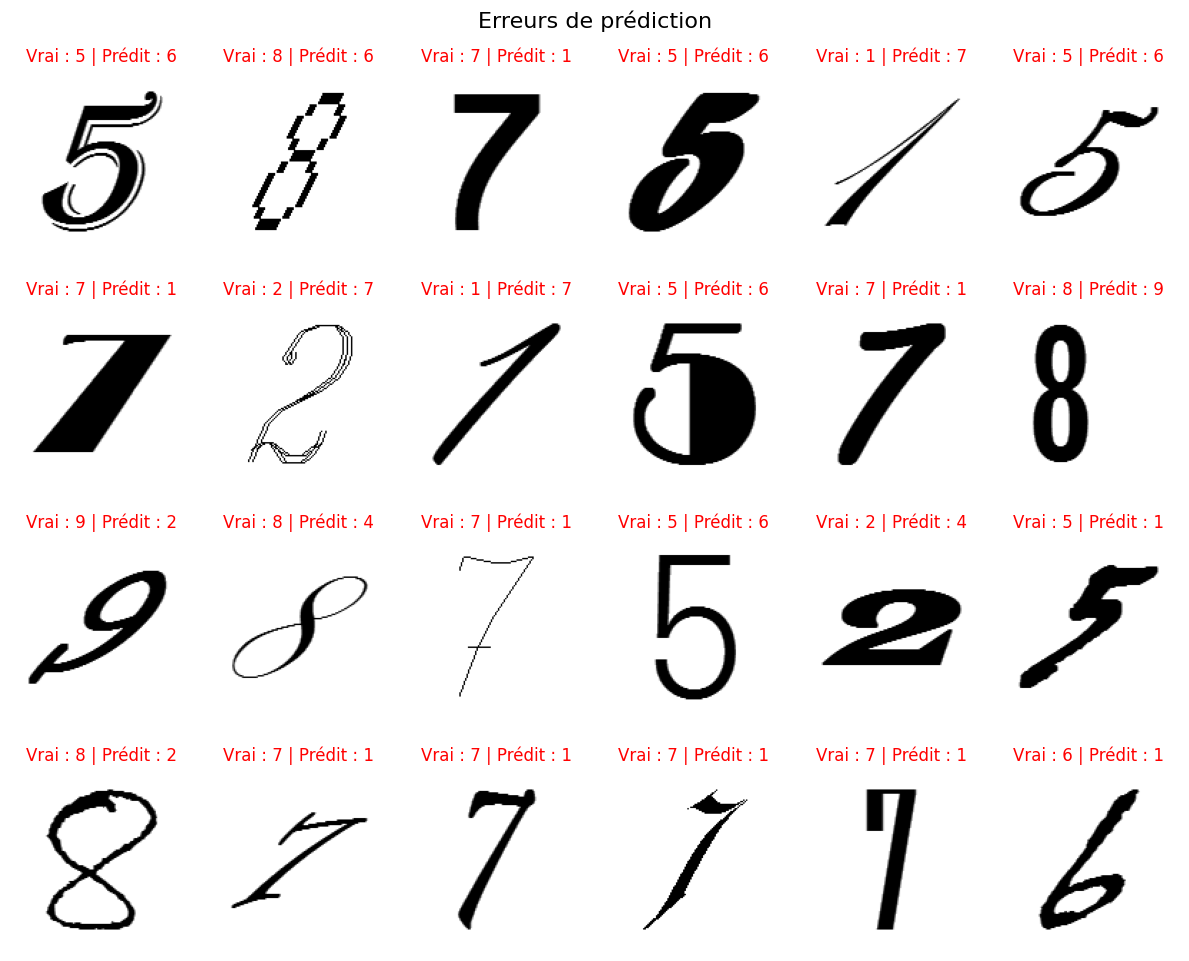

In [101]:
# Affichage des premières erreurs
plt.figure(figsize=(12, 10))
for i, idx in enumerate(errors[:24]):
    plt.subplot(4, 6, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"Vrai : {y_test[idx]} | Prédit : {y_pred[idx]}", color='red')
    plt.axis('off')
plt.suptitle("Erreurs de prédiction", fontsize=16)
plt.tight_layout()
plt.show()


In [102]:

model.save("sudoku_model.keras")
